# 1.IMPORTING LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings("ignore")

# 2. Loading and viewing dataset 

In [4]:
training = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [8]:
training.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [7]:
test.count()

PassengerId    418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked       418
dtype: int64

In [9]:
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
print(training.keys())
print(test.keys())

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [12]:
training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 3.0 DEALING WITH NaN Values

In [14]:
training.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [23]:
#training.drop(labels = ["Cabin", "Ticket"], axis = 1, inplace = True)
training

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


In [24]:
training.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [25]:
test.drop(labels=["Cabin","Ticket"],axis=1,inplace=True)

In [27]:
test.isna().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

In [36]:
copy=training.copy()
copy.dropna(inplace=True)
copy.count()

PassengerId    712
Survived       712
Pclass         712
Name           712
Sex            712
Age            712
SibSp          712
Parch          712
Fare           712
Embarked       712
dtype: int64

# 4. Visualization

<AxesSubplot:xlabel='Age', ylabel='Density'>

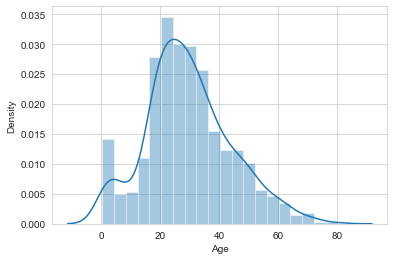

In [37]:
sns.distplot(copy["Age"])

In [40]:
# training["Age"].median()
test["Age"].median()

27.0

In [45]:
training["Age"].fillna(training["Age"].median(),inplace=True)
test["Age"].fillna(training["Age"].median(),inplace=True)
training["Embarked"].fillna("S",inplace=True)
test["Fare"].fillna(test["Fare"].median(),inplace=True)

In [48]:
# training.isna().sum()
test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

# PLOTTING AND VISUALIZING DATA

## GENDER RELATION

Total people survived is : 342
proportions of females survived  :
0.6812865497076024
proportions of males survived  :
0.31871345029239767


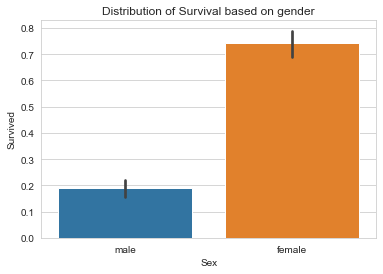

In [87]:
sns.barplot(x="Sex",y="Survived",data=training) 
plt.title("Distribution of Survival based on gender")

total_survived_females=training[training.Sex == 'female']["Survived"].sum()
total_survived_males=training[training.Sex == 'male']["Survived"].sum()

print("Total people survived is : " + str((total_survived_females+total_survived_males)))
print("proportions of females survived  :")
print(total_survived_females/(total_survived_females + total_survived_males))
print("proportions of males survived  :")
print(total_survived_males/(total_survived_females + total_survived_males))



In [203]:
training[training.Sex == 'female']['Survived'].value_counts()
# training[training.Sex == 'male']['Survived'].value_counts()
# training[training.Sex == 'female'].count()
# training[training.Sex == 'male'].count()

1    233
0     81
Name: Survived, dtype: int64

In [177]:
# training[training.Sex == 'male']['Survived'].sum()
training[training.Sex == 'female']['Survived'].sum()

233

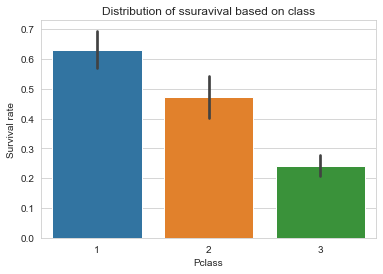

total people survived  : 342
Proportion of Class 1 Passengers who survived:
0.39766081871345027
Proportion of Class 2 Passengers who survived:
0.2543859649122807
Proportion of Class 3 Passengers who survived:
0.347953216374269


In [107]:
sns.barplot(x="Pclass" , y="Survived",data=training)

plt.title("Distribution of ssuravival based on class")
plt.ylabel("Survival rate")
plt.show()

total_survived_one = training[training.Pclass == 1]["Survived"].sum()
total_survived_two = training[training.Pclass == 2]["Survived"].sum()
total_survived_three = training[training.Pclass == 3]["Survived"].sum()

total_survived_class = total_survived_one + total_survived_two + total_survived_three

print("total people survived  :",total_survived_class )

print("Proportion of Class 1 Passengers who survived:") 
print(total_survived_one/total_survived_class)
print("Proportion of Class 2 Passengers who survived:")
print(total_survived_two/total_survived_class)
print("Proportion of Class 3 Passengers who survived:")
print(total_survived_three/total_survived_class)

In [210]:
# female_list = training[training["Sex"] == "female"]
# female_list.count()
# female_list_survived = training[training["Survived"] == 1].sum()
# female_list_survived

In [ ]:
# # which class of people survived the most
# data = [training["f"]]

In [183]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


<AxesSubplot:title={'center':'Total number of people survived'}, ylabel='Survived'>

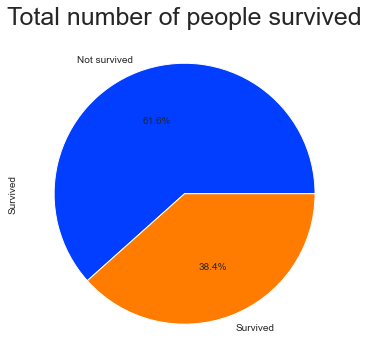

In [199]:
colors = sns.color_palette("bright")
plt.figure(figsize=(10,6))
labels = ['Not survived',"Survived"]
plt.title('Total number of people survived', fontsize =25)
training["Survived"].value_counts().plot(kind = 'pie',labels = labels,colors = colors,autopct="%0.1f%%")

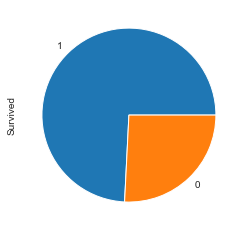

In [206]:
data = training[training.Sex == 'female']['Survived'].value_counts().plot(kind='pie')

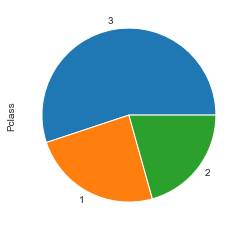

In [209]:
data = training["Pclass"].value_counts().plot(kind='pie')

Text(0.5, 1.0, 'Survival rates based on gender and class')

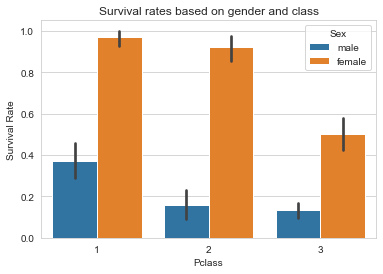

In [212]:
sns.barplot(x="Pclass",y="Survived",hue="Sex",data=training)
plt.ylabel("Survival Rate")
plt.title("Survival rates based on gender and class")

In [ ]:
sns.bar

<AxesSubplot:>

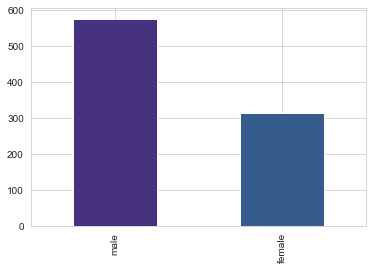

In [244]:
dataf = training["Sex"].value_counts()
dataf.plot(kind='bar',color = sns.color_palette('viridis'))

Text(0.5, 1.0, 'Survival rates based on gender and class')

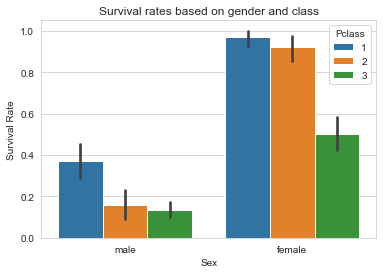

In [246]:
sns.barplot(x = 'Sex',y='Survived',hue='Pclass',data=training)
plt.ylabel("Survival Rate")
plt.title("Survival rates based on gender and class")

# AGE FACTOR IN SURVIVABILITY

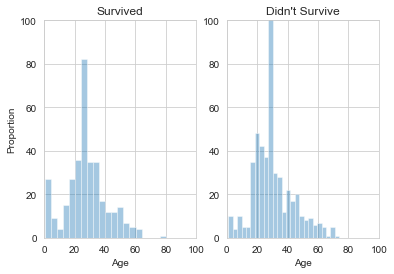

In [266]:
survived_ages = training[training.Survived == 1]["Age"]
not_survived_ages = training[training.Survived == 0]["Age"]
plt.subplot(1, 2, 1)
sns.distplot(survived_ages, kde=False)
plt.axis([0, 100, 0, 100])
plt.title("Survived")
plt.ylabel("Proportion")
plt.subplot(1, 2, 2)
sns.distplot(not_survived_ages, kde=False)
plt.axis([0, 100, 0, 100])
plt.title("Didn't Survive")
plt.show()

<AxesSubplot:xlabel='Survived', ylabel='Age'>

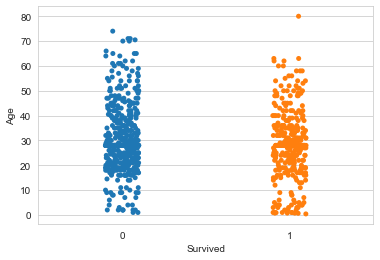

In [278]:
sns.stripplot(x="Survived",y='Age',data=training,jitter=True)

<AxesSubplot:xlabel='Survived', ylabel='Age'>

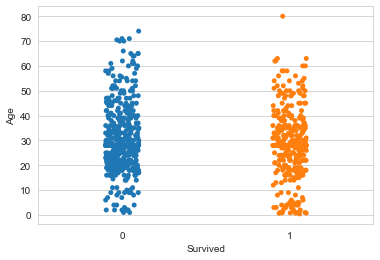

In [277]:
sns.stripplot(x="Survived",y='Age',data=training)

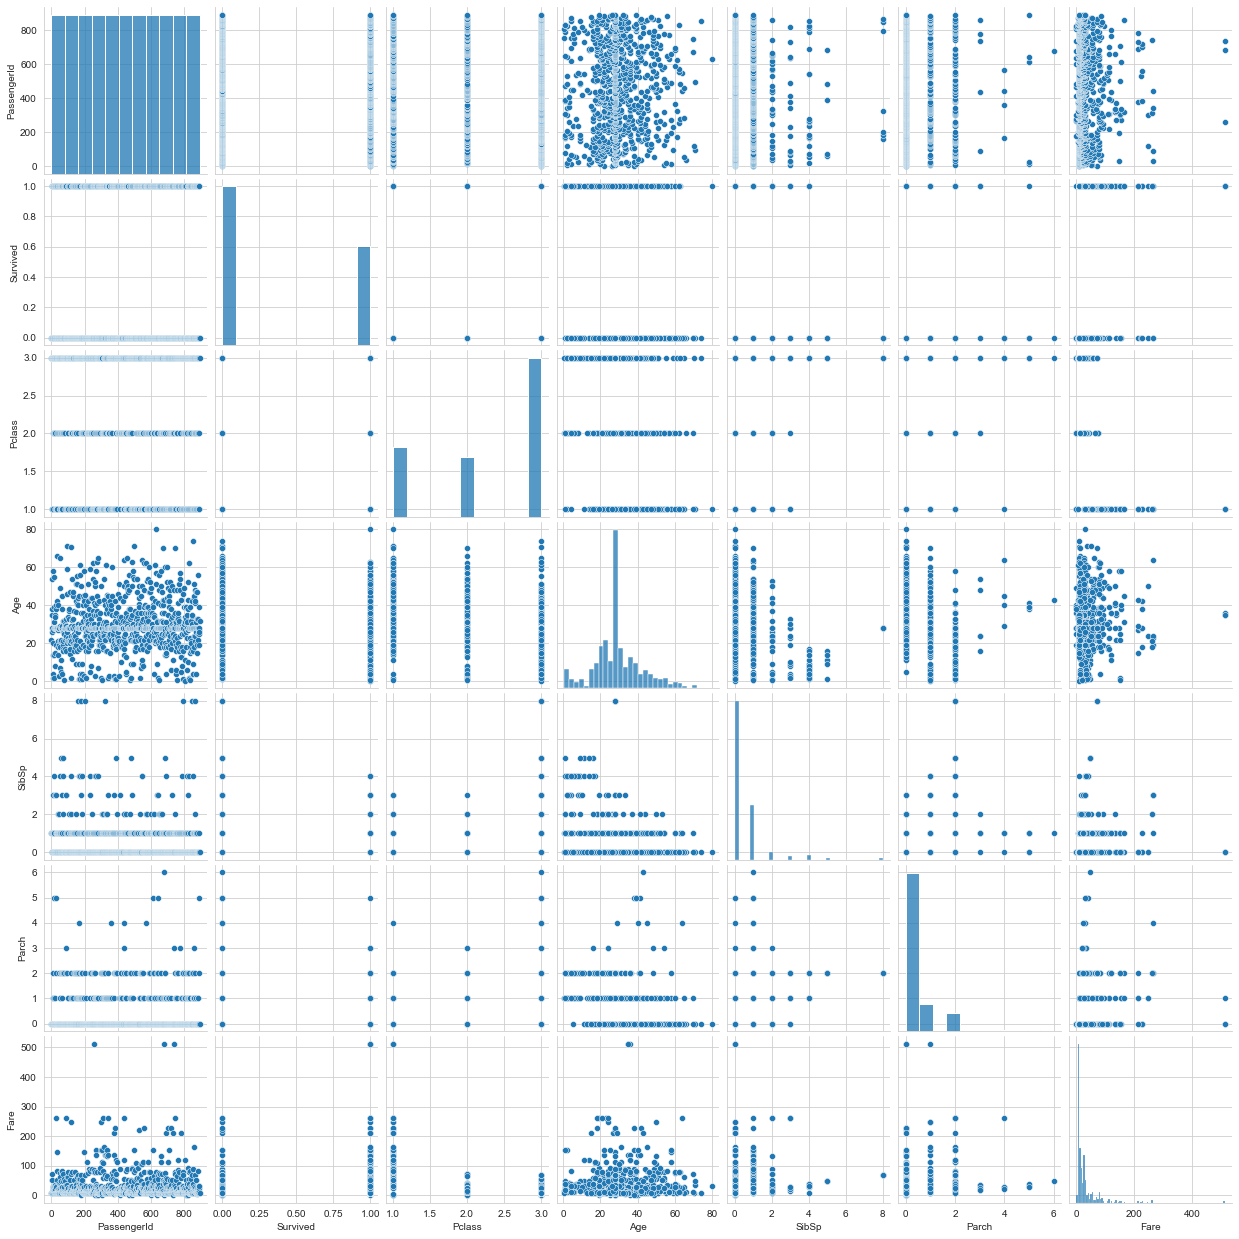

In [288]:
g = sns.pairplot(training)

# 5 Feature engineering


# 
Because values in the Sex and Embarked 
columns are categorical values,
we have to represent these strings as numerical values in 
order to perform our classification with our model. 
We can also do this process through One-Hot-Encoding.

In [292]:
training.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
760,761,0,3,"Garfirth, Mr. John",male,28.0,0,0,14.5000,S
223,224,0,3,"Nenkoff, Mr. Christo",male,28.0,0,0,7.8958,S
292,293,0,2,"Levy, Mr. Rene Jacques",male,36.0,0,0,12.8750,C
250,251,0,3,"Reed, Mr. James George",male,28.0,0,0,7.2500,S
64,65,0,1,"Stewart, Mr. Albert A",male,28.0,0,0,27.7208,C


In [294]:
test.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
39,931,3,"Hee, Mr. Ling",male,28.0,0,0,56.4958,S
154,1046,3,"Asplund, Master. Filip Oscar",male,13.0,4,2,31.3875,S
356,1248,1,"Brown, Mrs. John Murray (Caroline Lane Lamson)",female,59.0,2,0,51.4792,S
67,959,1,"Moore, Mr. Clarence Bloomfield",male,47.0,0,0,42.4000,S
207,1099,2,"Collett, Mr. Sidney C Stuart",male,24.0,0,0,10.5000,S


going to change 
MALE = 0
female = 1 for convinience for both training and testing